In [1]:
# Importing necessary libraries

import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset
data = pd.read_csv("data/BA_reviews.csv")

In [3]:
data.columns
data = data.drop(columns=["Unnamed: 0"])
data.head()
# Prints the first 5 rows of the dataset

,reviews
0,"✅ Trip Verified | Four very pleasant, on time..."
1,Not Verified | We travel extensively over 25...
2,✅ Trip Verified | Flight delayed an hour due ...
3,✅ Trip Verified | A very full flight made Pre...
4,✅ Trip Verified | The worst airline I’ve ever ...


In [4]:
# Removing unnecessary text

data["reviews"] = data["reviews"].str.strip("✅ Trip Verified | ")
data["reviews"] = data["reviews"].str.strip("Not Verified | ")
new_name = {'reviews': 'Review'}
df = data.rename(columns=new_name)
df.head(10)

,Review
0,"Four very pleasant, on time flights with frien..."
1,We travel extensively over 25 years and tend t...
2,Flight delayed an hour due to bad weather arou...
3,A very full flight made Premium Economy feel a...
4,he worst airline I’ve ever flown. Could not ch...
5,I am surprised to be able to give a favourable...
6,Flew British Airways on BA 434 London Heathrow...
7,BA cancelled the flight from Tokyo to LHR. I w...
8,I strongly advise everyone to never fly Britis...
9,My partner and I were on the BA2166 return fli...


In [5]:
# Printing out how many times 'cancelled' appears in the review column

df['Review'].str.contains("cancelled").sum()

np.int64(163)

In [6]:
df['Sentiment'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

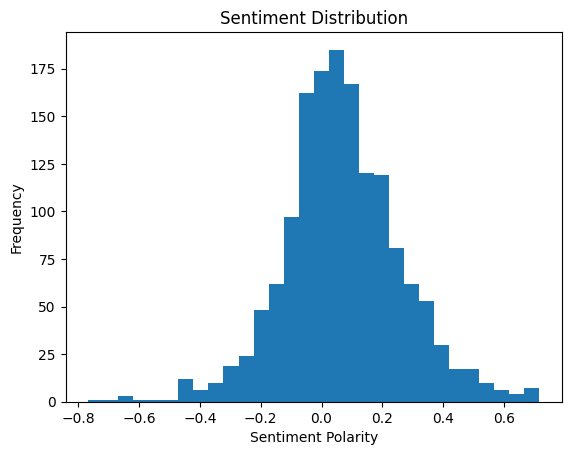

In [7]:
# Visualizing the sentiment distribution
plt.hist(df['Sentiment'], bins=30)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


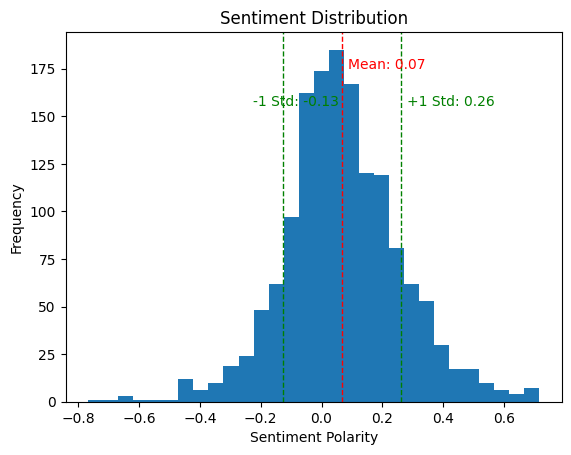

In [8]:
mean_sentiment = df['Sentiment'].mean()
std_sentiment = df['Sentiment'].std()

# Visualizing the sentiment distribution
plt.hist(df['Sentiment'], bins=30)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')

plt.axvline(mean_sentiment, color='r', linestyle='dashed', linewidth=1)
plt.text(mean_sentiment + 0.02, plt.ylim()[1] * 0.9, f'Mean: {mean_sentiment:.2f}', color='r')
plt.axvline(mean_sentiment + std_sentiment, color='g', linestyle='dashed', linewidth=1)
plt.axvline(mean_sentiment - std_sentiment, color='g', linestyle='dashed', linewidth=1)
plt.text(mean_sentiment + std_sentiment + 0.02, plt.ylim()[1] * 0.8, f'+1 Std: {mean_sentiment + std_sentiment:.2f}', color='g')
plt.text(mean_sentiment - std_sentiment - 0.1, plt.ylim()[1] * 0.8, f'-1 Std: {mean_sentiment - std_sentiment:.2f}', color='g')
plt.show()

In [9]:
# Classify reviews
df['Sentiment_Label'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Calculate percentages
total_reviews = len(df)
positive_reviews = len(df[df['Sentiment_Label'] == 'Positive'])
negative_reviews = len(df[df['Sentiment_Label'] == 'Negative'])
neutral_reviews = len(df[df['Sentiment_Label'] == 'Neutral'])

positive_percentage = (positive_reviews / total_reviews) * 100
negative_percentage = (negative_reviews / total_reviews) * 100
neutral_percentage = (neutral_reviews / total_reviews) * 100

print(f"Total Reviews: {total_reviews}")
print(f"Positive Reviews: {positive_reviews} ({positive_percentage:.2f}%)")
print(f"Negative Reviews: {negative_reviews} ({negative_percentage:.2f}%)")
print(f"Neutral Reviews: {neutral_reviews} ({neutral_percentage:.2f}%)")


Total Reviews: 1500
Positive Reviews: 956 (63.73%)
Negative Reviews: 530 (35.33%)
Neutral Reviews: 14 (0.93%)


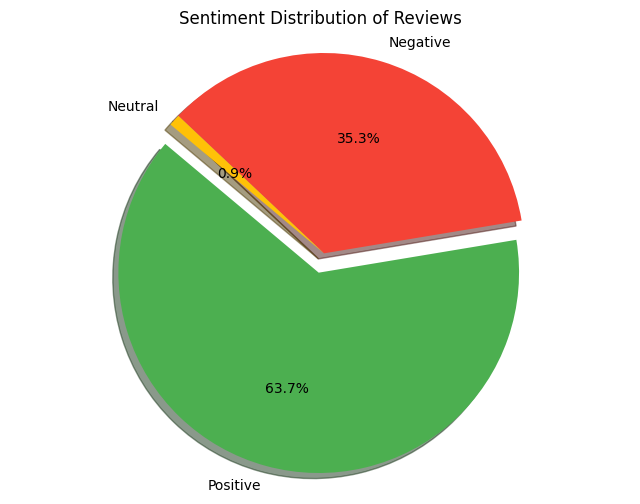

In [10]:

# Data for the pie chart
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_percentage, negative_percentage, neutral_percentage]
colors = ['#4CAF50', '#F44336', '#FFC107']
explode = (0.1, 0, 0)  # explode the 1st slice (Positive)

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Sentiment Distribution of Reviews')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Thank You!